# Vector layer to mask out non-pasture areas

In [6]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# vectorised layer of pastures based on CLC 2018 data
pastures = gpd.read_file(
    os.path.join("data", "land-cover", "clc-2018", "clc-2018-pasture.gpkg"),
    layer="dissolved"
)
pastures.to_crs(2157, inplace=True)

In [3]:
# Ireland boundary
ie = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries.gpkg"),
    layer="NUTS_RG_01M_2021_2157_IE"
)

In [4]:
# non-pasture area mask
ie_ = ie.overlay(pastures, how="symmetric_difference")

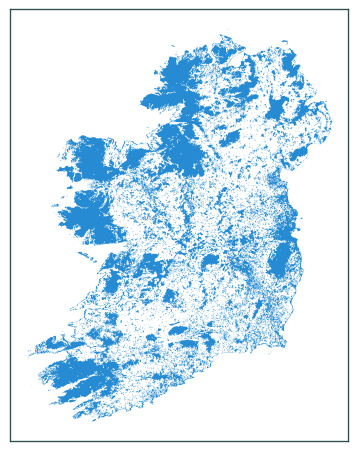

In [7]:
ie_.plot()
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [8]:
ie_.to_file(
    os.path.join("data", "boundaries", "boundaries.gpkg"),
    layer="CLC_2018_MASK_PASTURE_2157_IE"
)